In [36]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### 1. return

In [62]:
# INSTRUCTION:
# change itv to generate results for 0.125, 0.25 ...
# change algorithm to either td3 or ppo
#----------------------------------------------------

import glob
# interval = ["point125","point25","point5","point75"]
# interval = ["vzero","vpoint1","vpoint3"]

# itv = interval[0]
itv = "one"
algorithm = "ddpg" # "ppo"
visitors = "multi"  # single
network = "64_64_NN" # 300_NN or 64_64_NN or 300_300_NN
# txt_dir = "../SHARCNET/Results/"+visitors + "/" + algorithm + "/" + network+"/new_64batchsize/"+itv+"/"
# txt_dir = "../SHARCNET/Results/multi/lazy_visitor_w_randomess/new_24actiondim/"+itv+"/"
txt_dir = "../SHARCNET/Results/single/ddpg/64_64_NN/new/one/"

# pic_dir = "./plots_for_thesis/"+visitors+"/"+algorithm+"/" + network+"/new_64batchsize/"
# pic_dir = "./plots_for_thesis/"+visitors+"/lazy_visitor_w_randomess/new_24actiondim/"
# pic_dir = "./plots_for_thesis/"+visitors+"/aug_obs/ddpg/new/"
pic_dir = "./plots_for_thesis/single/ddpg/64_64_NN/new/"
modes = ["SARA","PLA"]
all_data_files = dict()
for mode in modes:
    mode_data_files = glob.glob(txt_dir+mode+ "/**/" +"*.txt", recursive=True)
    mode_data_files.sort()
    print("{}: {} files found".format(mode,len(mode_data_files)))
    for f in mode_data_files:
        print(f)
    all_data_files[mode]=mode_data_files

SARA: 8 files found
../SHARCNET/Results/single/ddpg/64_64_NN/new/one/SARA\2019-10-28-144314-0-0\ddpg\ddpg_s0\progress.txt
../SHARCNET/Results/single/ddpg/64_64_NN/new/one/SARA\2019-10-28-144314-0-11\ddpg\ddpg_s0\progress.txt
../SHARCNET/Results/single/ddpg/64_64_NN/new/one/SARA\2019-10-28-144314-1-0\ddpg\ddpg_s0\progress.txt
../SHARCNET/Results/single/ddpg/64_64_NN/new/one/SARA\2019-10-28-144314-1-10\ddpg\ddpg_s0\progress.txt
../SHARCNET/Results/single/ddpg/64_64_NN/new/one/SARA\2019-10-28-144927-0-20\ddpg\ddpg_s0\progress.txt
../SHARCNET/Results/single/ddpg/64_64_NN/new/one/SARA\2019-10-28-144927-1-20\ddpg\ddpg_s0\progress.txt
../SHARCNET/Results/single/ddpg/64_64_NN/new/one/SARA\2019-10-28-145503-0-30\ddpg\ddpg_s0\progress.txt
../SHARCNET/Results/single/ddpg/64_64_NN/new/one/SARA\2019-10-28-145503-1-30\ddpg\ddpg_s0\progress.txt
PLA: 6 files found
../SHARCNET/Results/single/ddpg/64_64_NN/new/one/PLA\2019-10-28-144314-0-0\ddpg\ddpg_s0\progress.txt
../SHARCNET/Results/single/ddpg/64_64_

In [63]:
txt_dir

'../SHARCNET/Results/single/ddpg/64_64_NN/new/one/'

In [64]:
all_combined_data = dict()
if algorithm == "ppo":
    metrics = ["AverageEpRet", "AverageVVals"]
    col_names = ["return", "V_means"]
elif algorithm == "ddpg":
    metrics = ["AverageEpRet", "AverageQVals"]
    col_names = ["return", "Q_means"]
else:
    metrics = ["AverageEpRet", "AverageQ1Vals", "AverageQ2Vals"]
    col_names = ["return","Q1_means","Q2_means"]
for mode in modes:

    mode_data = []
    for file in all_data_files[mode]:
        mode_data.append(pd.read_csv(file, sep="\t"))
    
    mode_combined_data = pd.DataFrame()
    for metric, col_name in zip(metrics, col_names):
        metric_combined_data = pd.DataFrame()
        for i in range(len(all_data_files[mode])):
            metric_combined_data[col_name+"_run"+str(i)] = mode_data[i][metric]
        metric_combined_data[col_name+"_avg"] = metric_combined_data.mean(axis=1)
        metric_combined_data[col_name+'_std'] = metric_combined_data.std(axis=1)
        
        mode_combined_data = pd.concat([mode_combined_data,metric_combined_data],axis=1)
    all_combined_data[mode] = mode_combined_data

In [65]:
all_combined_data['PLA']

,return_run0,return_run1,return_run2,return_run3,return_run4,return_run5,return_avg,return_std,Q_means_run0,Q_means_run1,Q_means_run2,Q_means_run3,Q_means_run4,Q_means_run5,Q_means_avg,Q_means_std
0,3.752952,3.254196,8.307645,6.112799,3.932897,7.255395,5.435981,1.909050,0.124805,0.099845,0.223298,0.195590,0.157281,0.271484,0.178717,0.058402
1,8.229535,12.731309,8.816844,7.739239,7.243284,6.746554,8.584461,1.969238,0.211855,0.308355,0.316070,0.273584,0.215869,0.295085,0.270136,0.041926
2,8.269948,12.567672,7.076719,11.143708,10.116261,4.150729,8.887506,2.776127,0.280390,0.400384,0.346643,0.341524,0.316957,0.277560,0.327243,0.042228
3,4.216851,8.726194,9.772530,8.073851,6.269533,13.432400,8.415226,2.871060,0.290756,0.457346,0.394716,0.394466,0.354166,0.382989,0.379073,0.050073
4,10.416653,13.423026,5.764429,11.570981,10.939665,8.779292,10.149008,2.399258,0.379426,0.551092,0.418149,0.457067,0.467241,0.486557,0.459922,0.053709
5,7.880191,11.792206,5.701847,6.643854,8.113551,7.507713,7.939894,1.903916,0.410808,0.644350,0.442501,0.495617,0.545617,0.569292,0.518031,0.078580
6,14.825688,4.280216,8.351338,6.742092,15.280494,7.607466,9.514549,4.113577,0.526901,0.719462,0.481062,0.528410,0.687007,0.655618,0.599743,0.090875
7,6.531944,4.595451,7.101263,5.810415,13.589336,4.457142,7.014259,3.090592,0.597917,0.757442,0.534962,0.567258,0.801132,0.694218,0.658821,0.098882
8,9.239972,4.659216,10.637795,5.946582,12.522965,2.839363,7.640982,3.420255,0.679592,0.764993,0.609794,0.597376,0.893890,0.725344,0.711832,0.100586
9,10.302203,8.827653,11.023461,14.228437,13.297568,7.539693,10.869836,2.337386,0.762606,0.795719,0.677950,0.674183,0.991737,0.773009,0.779201,0.105703


save to ./plots_for_thesis/single/ddpg/64_64_NN/new/
save to ./plots_for_thesis/single/ddpg/64_64_NN/new/


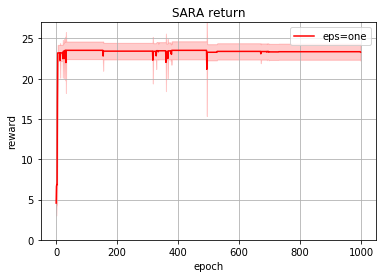

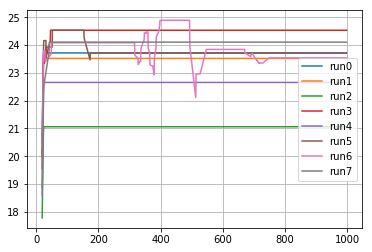

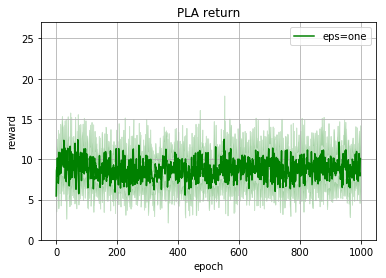

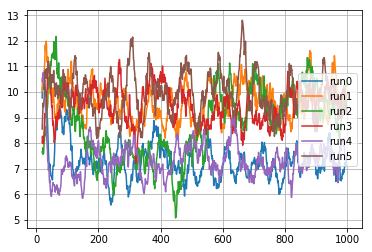

In [77]:
# Plot return
colors = ['r','g','b']
metric = "return"
modes = ["SARA","PLA"]
for mode, c in zip(modes, colors):

    data = all_combined_data[mode]
    length = data.shape[0]
    if length == 0:
        print("No data from {}".format(mode))
        continue
#     label = "[0, "+itv.replace("point","0.")+"]"
    label = "eps="+itv.replace("vpoint","0.").replace("vzero", "0")
    
    plt.figure()
    plt.grid()
    plt.fill_between(data.index, data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(data.index, data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
    plt.ylim([0,27])
    plt.title('{} {}'.format(mode,metric))
    plt.xlabel("epoch")
    plt.ylabel("reward")
    plt.savefig(pic_dir+"{}_{}_{}.png".format(itv,mode,metric), bbox_inches='tight')
    print("save to {}".format(pic_dir))
    
    plt.figure()
    plt.grid()
    for i in range(len(all_data_files[mode])):
        plt.plot(data.index, data[metric+'_run'+str(i)].rolling(window=20).mean(), '-', label="run"+str(i))
    plt.legend(loc="right")
    plt.savefig(pic_dir+"{}_{}_{}_allrun.png".format(itv,mode,metric), bbox_inches='tight')
    

### 2. V_mean

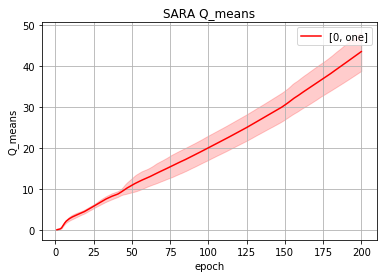

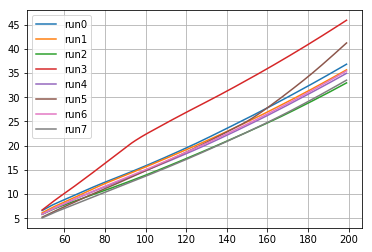

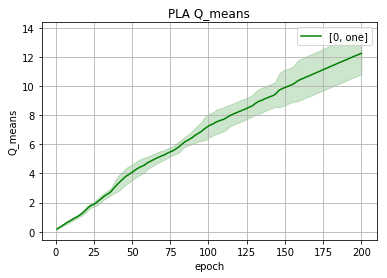

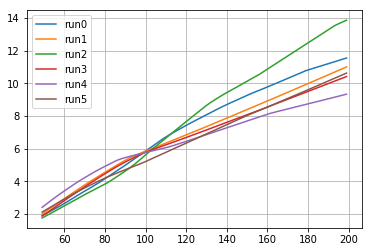

In [69]:
from matplotlib.colors import LogNorm
colors = ['r','g','b']
metric = "Q_means"
modes = ["SARA","PLA"]
for mode, c in zip(modes, colors):

    data = all_combined_data[mode]
    length = data.shape[0]
    if length == 0:
        print("No data from {}".format(mode))
        continue
    label = "[0, "+itv.replace("point","0.")+"]"
    
    plt.figure()
    plt.grid()
    plt.fill_between(np.linspace(1,length,length)[:200], data[metric+"_avg"][:200] - data[metric+"_std"][:200],
                 data[metric+'_avg'][:200] + data[metric+'_std'][:200], alpha=0.2,
                 color=c)
    plt.plot(np.linspace(1,length,length)[:200], data[metric+'_avg'][:200], '-', color=c, label=label)
    plt.legend(loc="best")
#     plt.ylim([0,27])
    plt.title('{} {}'.format(mode,metric))
    plt.xlabel("epoch")
    plt.ylabel(metric)
    plt.savefig(pic_dir+'/{}_{}_{}.png'.format(itv,mode,metric), bbox_inches='tight')
    
    
    plt.figure()
    plt.grid()
    for i in range(0,len(all_data_files[mode])):
        plt.plot(data.index[:200], data[metric+'_run'+str(i)][:200].rolling(window=50).mean(), '-', label="run"+str(i))
    plt.legend(loc="best")

    

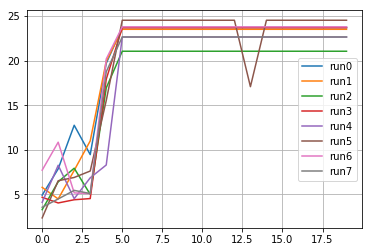

In [90]:
metric="return"
mode="SARA"
plt.figure()
plt.grid()
data = all_combined_data[mode]
for i in range(len(all_data_files[mode])):
    plt.plot(data.index[:20], data[metric+'_run'+str(i)][:20].rolling(window=1).mean(), '-', label="run"+str(i))
plt.legend(loc="right")